### Load Test HRRRAK Data

Notebook contents 
* from script `./download_hrrrak_final.sh 2025 03 01` 
* the goal is to look at all the variables and figure out how to manage them 

created by Cassie Lumbrazo\
last updated: March 2025\
run location: UAS linux\
python environment: **xarray**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

#### Download Attempt 1

In [6]:
filepath = '/home/cassie/python/download_hrrr/'
# file = 'hrrr.20250301/hrrr.t00z.wrfsfcf00.ak.grib2' # why not forcast 0? 
filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf01.ak.grib2'
# filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf02.ak.grib2'
# filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf03.ak.grib2'

# open the file 
# ds = xr.open_dataset(filepath + filename, engine='cfgrib', backend_kwargs={'indexpath': ''})
ds = xr.open_dataset(filepath + filename, engine='cfgrib', filter_by_keys={'stepType':'instant'})
ds

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(2.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/

<xarray.Dataset> Size: 25kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    surface            float64 8B ...
    latitude           (y, x) float64 3kB ...
    longitude          (y, x) float64 3kB ...
    valid_time         datetime64[ns] 8B ...
    heightAboveGround  float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    sp                 (y, x) float32 2kB ...
    orog               (y, x) float32 2kB ...
    t                  (y, x) float32 2kB ...
    sdwe               (y, x) float32 2kB ...
    snowc              (y, x) float32 2kB ...
    sde                (y, x) float32 2kB ...
    t2m                (y, x) float32 2kB ...
    r2                 (y, x) float32 2kB ...
    prate              (y, x) float32 2kB ...
    sdswrf             (y, x) float32 2kB ...
    sdlwrf             (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-03-28T08:31 GRIB to CDM+CF via cfgrib-0.9.1...

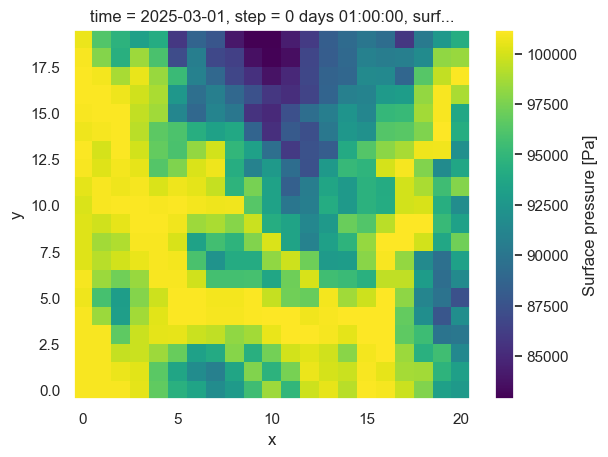

In [7]:
ds.sp.plot()

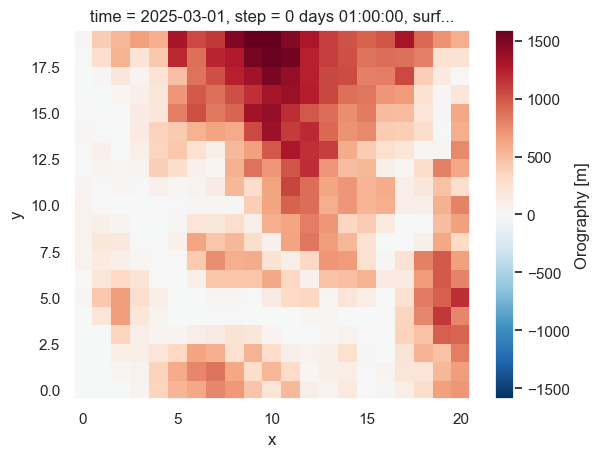

In [8]:
ds.orog.plot()

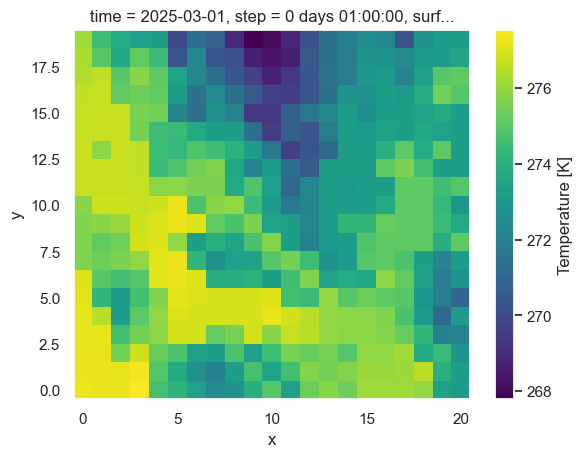

In [9]:
ds.t.plot()

So `t` is surface temperature

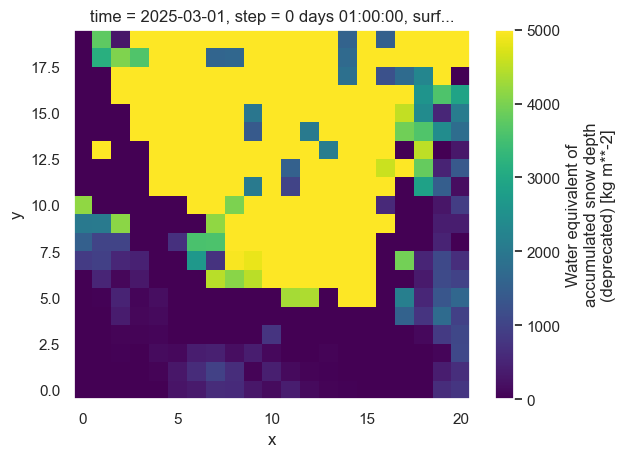

In [10]:
ds.sdwe.plot()

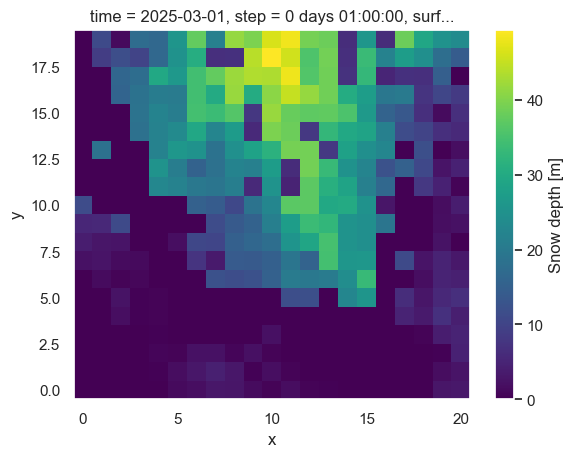

In [11]:
ds.sde.plot()

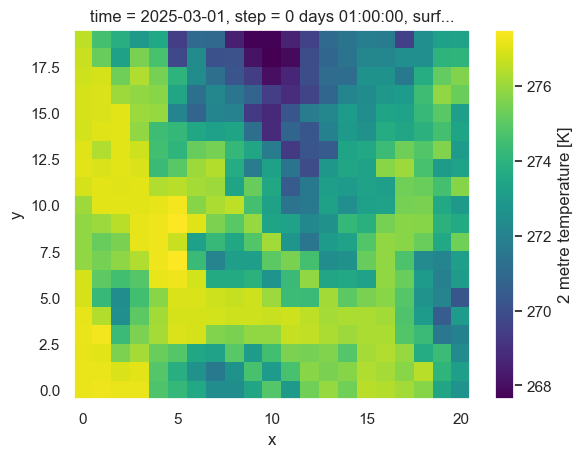

In [12]:
ds.t2m.plot()

Now, `t2m` is the 2m air temperature

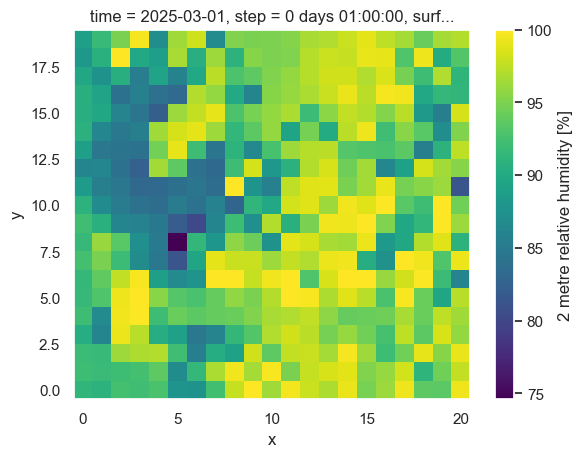

In [13]:
ds.r2.plot()

and 2m relative humidity 

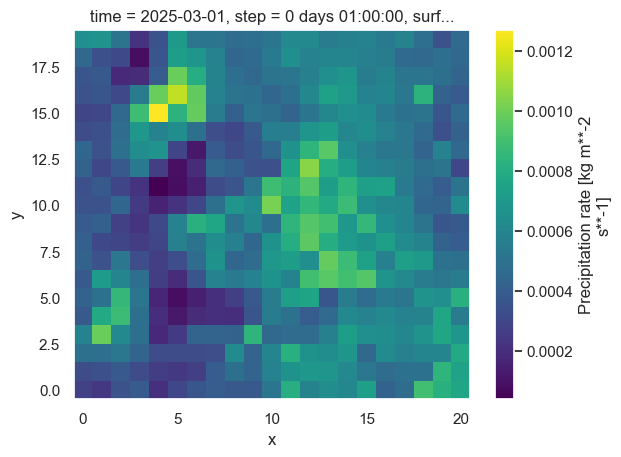

In [14]:
ds.prate.plot()

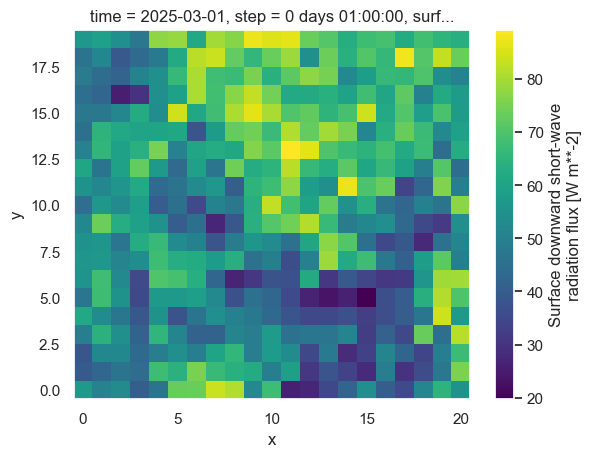

In [15]:
ds.sdswrf.plot()

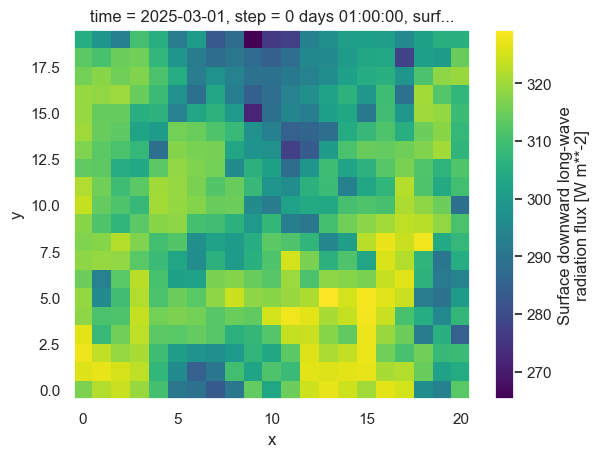

In [16]:
ds.sdlwrf.plot()

#### Now, when I first tried to download the dataset, it needed `instant` or `accum` variables specified so let's look at `accum` 

In [17]:
filepath = '/home/cassie/python/download_hrrr/'
# filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf00.ak.grib2' # why not forcast 0? 
filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf01.ak.grib2'
# filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf02.ak.grib2'
# filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf03.ak.grib2'

# open the filename 
# ds = xr.open_dataset(filepath + filename, engine='cfgrib') # getting en error that we need to specify instant or accum keys 
ds = xr.open_dataset(filepath + filename, engine='cfgrib', filter_by_keys={'stepType':'instant'})
# ds = xr.open_dataset(filepath + filename, engine='cfgrib', filter_by_keys={'stepType':'accum'})
ds

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(2.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/

<xarray.Dataset> Size: 25kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    surface            float64 8B ...
    latitude           (y, x) float64 3kB ...
    longitude          (y, x) float64 3kB ...
    valid_time         datetime64[ns] 8B ...
    heightAboveGround  float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    sp                 (y, x) float32 2kB ...
    orog               (y, x) float32 2kB ...
    t                  (y, x) float32 2kB ...
    sdwe               (y, x) float32 2kB ...
    snowc              (y, x) float32 2kB ...
    sde                (y, x) float32 2kB ...
    t2m                (y, x) float32 2kB ...
    r2                 (y, x) float32 2kB ...
    prate              (y, x) float32 2kB ...
    sdswrf             (y, x) float32 2kB ...
    sdlwrf             (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-03-28T08:31 GRIB to CDM+CF via cfgrib-0.9.1...

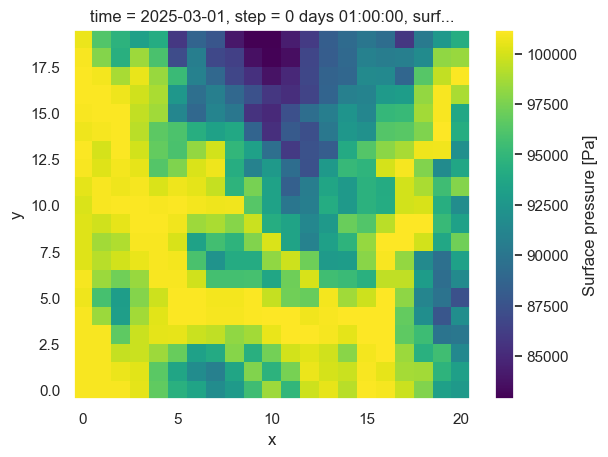

In [21]:
ds.sp.plot()

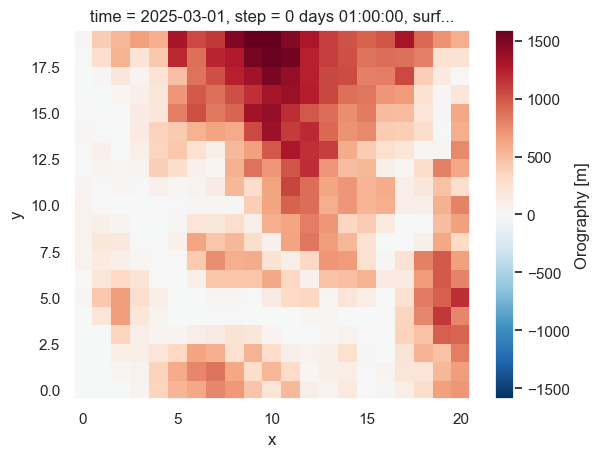

In [22]:
ds.orog.plot()

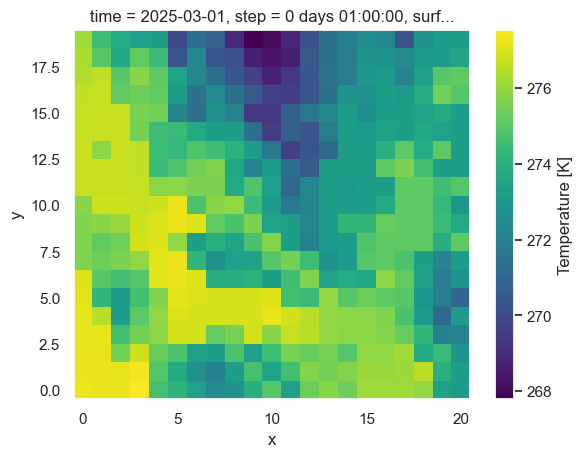

In [18]:
ds.t.plot()

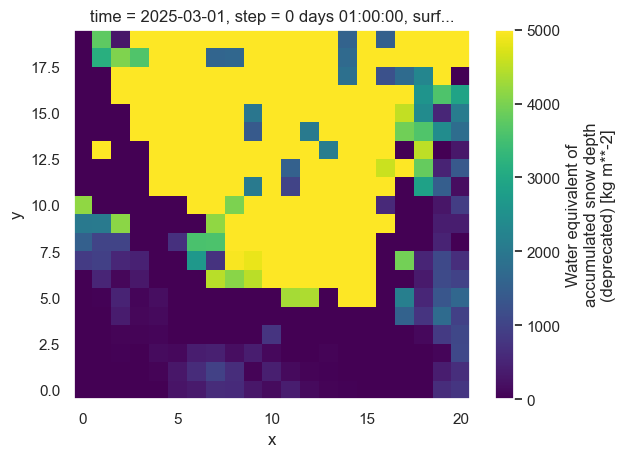

In [23]:
ds.sdwe.plot()

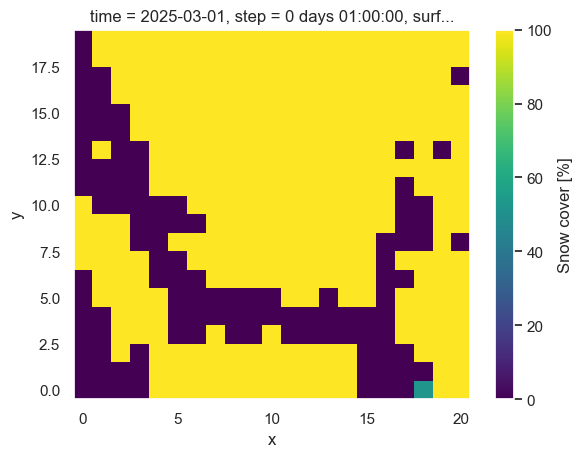

In [24]:
ds.snowc.plot()

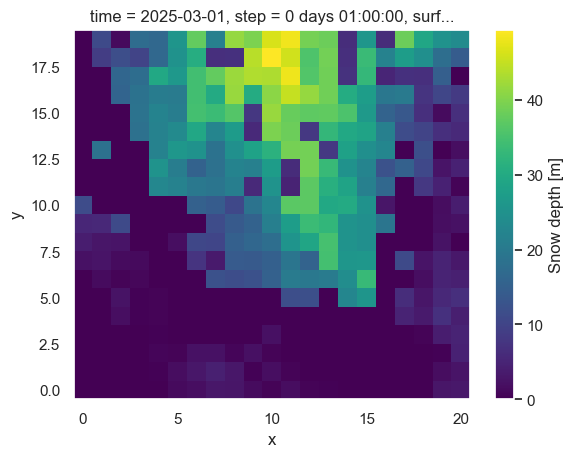

In [25]:
ds.sde.plot()

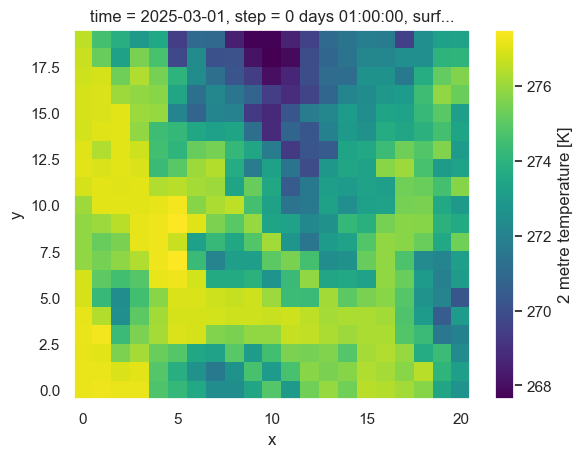

In [26]:
ds.t2m.plot()

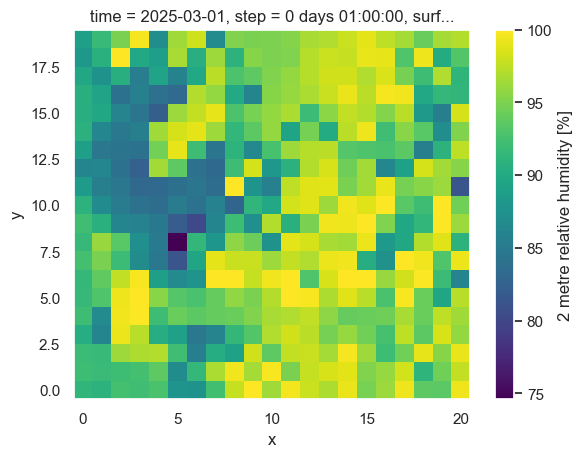

In [27]:
ds.r2.plot()

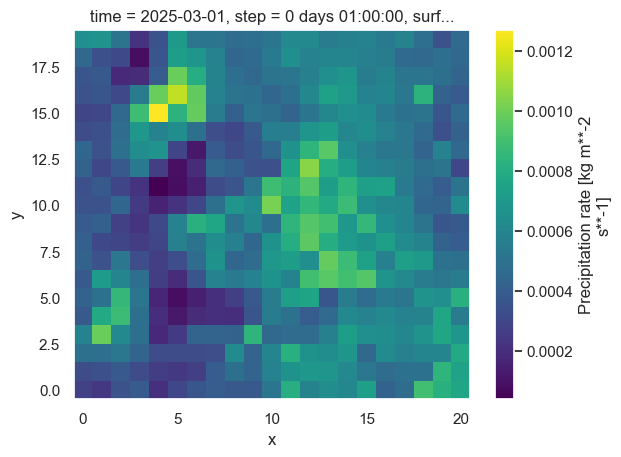

In [28]:
ds.prate.plot()

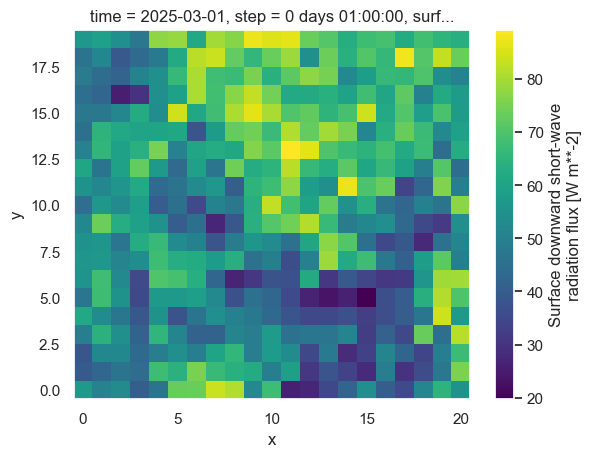

In [29]:
ds.sdswrf.plot()

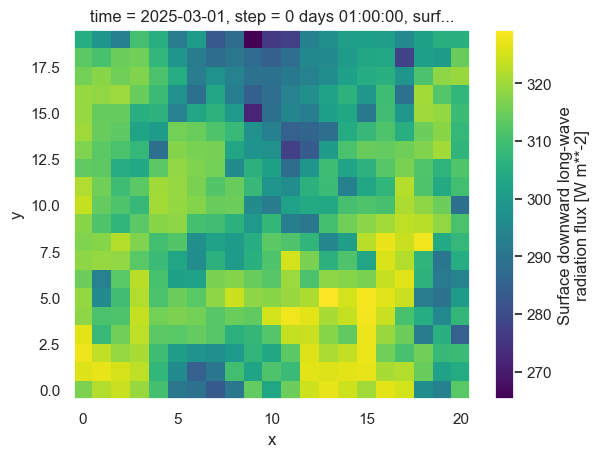

In [30]:
ds.sdlwrf.plot()

#### So, we are missing a few things... 

The entire list of variables we should have are, 
* pressure, PRES, SP, surface 
* orography, HGT, OROG, surface
* air temperature, TMP surface, 
* relative humidity, RH 2m
* U-component wind, UGRD 10m, **not importing with the ds...*
* V-component wind, VGRD 10m, **not importing with the ds...*
* in shortwave rad, DWSRF surface 
* in longwave rad, DLWRF surface
* TMP, temperature, 2m 
* precipitation, APCP surface, **not importing with the ds...*
* precipitation, PRATE surface
* snow depth, SNOD surface
* ground temperature, TSOIL 0-0m, **this is not downloading at all as of right now**
* SWE, WEASD surface
* snow cover, SNOWC surface
* snowfall, ASNOW surface **this is not downloading at all as of right now**

#### Download Attempt 3, using Grib

In [32]:
filepath = '/home/cassie/python/download_hrrr/'
# file = 'hrrr.20250301/hrrr.t00z.wrfsfcf00.ak.grib2' # why not forcast 0? 
filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf01.ak.grib2'
# filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf02.ak.grib2'
# filename = 'hrrr.20250301/hrrr.t00z.wrfsfcf03.ak.grib2'

# open the file 
# ds = xr.open_dataset(filepath + filename, engine='cfgrib') # getting en error that we need to specify instant or accum keys 
ds = xr.open_dataset(filepath + filename, engine='cfgrib', filter_by_keys={'stepType':'instant'})
# so that error said they are skipping variables shortName='u10' and 'v10'
# ds = xr.open_dataset(filepath + filename, engine='cfgrib', filter_by_keys={'stepType':'accum'}) # accum was basically nothing... 
# ds = xr.open_dataset(filepath + filename, engine='cfgrib', filter_by_keys={'stepType':'instant', 'heightAboveGround':10.0}) # this is not working, empty ds

# key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(2.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))

# ds = xr.open_dataset(filepath + filename, engine='cfgrib', filter_by_keys={'shortName': ['u10', 'v10']}) # also not working
ds

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(2.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/

<xarray.Dataset> Size: 25kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    surface            float64 8B ...
    latitude           (y, x) float64 3kB ...
    longitude          (y, x) float64 3kB ...
    valid_time         datetime64[ns] 8B ...
    heightAboveGround  float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    sp                 (y, x) float32 2kB ...
    orog               (y, x) float32 2kB ...
    t                  (y, x) float32 2kB ...
    sdwe               (y, x) float32 2kB ...
    snowc              (y, x) float32 2kB ...
    sde                (y, x) float32 2kB ...
    t2m                (y, x) float32 2kB ...
    r2                 (y, x) float32 2kB ...
    prate              (y, x) float32 2kB ...
    sdswrf             (y, x) float32 2kB ...
    sdlwrf             (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-03-28T08:40 GRIB to CDM+CF via cfgrib-0.9.1...

In [90]:
ds['t2m'].heightAboveGround

<xarray.DataArray 'heightAboveGround' ()> Size: 8B
[1 values with dtype=float64]
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    surface            float64 8B ...
    valid_time         datetime64[ns] 8B ...
    heightAboveGround  float64 8B ...
Attributes:
    long_name:      height above the surface
    units:          m
    positive:       up
    standard_name:  height

In [91]:
ds['t2m'].attrs

{'GRIB_paramId': 167,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 420,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'air_temperature',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '2 metre temperature',
 'GRIB_shortName': '2t',
 'GRIB_units': 'K',
 'long_name': '2 metre temperature',
 'units': 'K',
 'standard_name': 'air_temperature'}

In [35]:
import cfgrib

In [74]:
# trying something else instead
ds = cfgrib.open_datasets(filepath + filename)
ds

[<xarray.Dataset> Size: 10kB
 Dimensions:            (y: 20, x: 21)
 Coordinates:
     time               datetime64[ns] 8B 2025-03-01
     step               timedelta64[ns] 8B 01:00:00
     heightAboveGround  float64 8B 10.0
     latitude           (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59
     longitude          (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.1
     valid_time         datetime64[ns] 8B 2025-03-01T01:00:00
 Dimensions without coordinates: y, x
 Data variables:
     u10                (y, x) float32 2kB ...
     v10                (y, x) float32 2kB ...
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather Service - NCEP
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             US National Weather Service - NCEP,
 <xarray.Dataset> Size: 10kB
 Dimensions:            (y: 20, x: 21)
 Coordinates:
     time               datetime64[ns] 8B 2025

In [75]:
# loop through for all ds
ds_list = []
for i in range(len(ds)):
    ds_list.append(ds[i])
ds_list

[<xarray.Dataset> Size: 10kB
 Dimensions:            (y: 20, x: 21)
 Coordinates:
     time               datetime64[ns] 8B 2025-03-01
     step               timedelta64[ns] 8B 01:00:00
     heightAboveGround  float64 8B 10.0
     latitude           (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59
     longitude          (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.1
     valid_time         datetime64[ns] 8B 2025-03-01T01:00:00
 Dimensions without coordinates: y, x
 Data variables:
     u10                (y, x) float32 2kB ...
     v10                (y, x) float32 2kB ...
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather Service - NCEP
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             US National Weather Service - NCEP,
 <xarray.Dataset> Size: 10kB
 Dimensions:            (y: 20, x: 21)
 Coordinates:
     time               datetime64[ns] 8B 2025

In [76]:
ds_list[0] # so, this is the 10m 

<xarray.Dataset> Size: 10kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B 2025-03-01
    step               timedelta64[ns] 8B 01:00:00
    heightAboveGround  float64 8B 10.0
    latitude           (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59
    longitude          (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.1
    valid_time         datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables:
    u10                (y, x) float32 2kB ...
    v10                (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [77]:
ds_10m = ds_list[0].copy()
ds_10m

<xarray.Dataset> Size: 10kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B 2025-03-01
    step               timedelta64[ns] 8B 01:00:00
    heightAboveGround  float64 8B 10.0
    latitude           (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59
    longitude          (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.1
    valid_time         datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables:
    u10                (y, x) float32 2kB ...
    v10                (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [78]:
ds_list[1] # this is the 2m 

<xarray.Dataset> Size: 10kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B 2025-03-01
    step               timedelta64[ns] 8B 01:00:00
    heightAboveGround  float64 8B 2.0
    latitude           (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59
    longitude          (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.1
    valid_time         datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                (y, x) float32 2kB ...
    r2                 (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [79]:
ds_2m = ds_list[1].copy()
ds_2m

<xarray.Dataset> Size: 10kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B 2025-03-01
    step               timedelta64[ns] 8B 01:00:00
    heightAboveGround  float64 8B 2.0
    latitude           (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59
    longitude          (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.1
    valid_time         datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                (y, x) float32 2kB ...
    r2                 (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [80]:
len(ds_list)

4

In [81]:
ds_list[2] # surface for everything 

<xarray.Dataset> Size: 25kB
Dimensions:     (y: 20, x: 21)
Coordinates:
    time        datetime64[ns] 8B 2025-03-01
    step        timedelta64[ns] 8B 01:00:00
    surface     float64 8B 0.0
    latitude    (y, x) float64 3kB 58.08 58.08 58.08 58.08 ... 58.59 58.59 58.59
    longitude   (y, x) float64 3kB 225.1 225.1 225.2 225.2 ... 226.0 226.0 226.1
    valid_time  datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables:
    unknown     (y, x) float32 2kB ...
    t           (y, x) float32 2kB ...
    sp          (y, x) float32 2kB ...
    prate       (y, x) float32 2kB ...
    sde         (y, x) float32 2kB ...
    orog        (y, x) float32 2kB ...
    tp          (y, x) float32 2kB ...
    snowc       (y, x) float32 2kB ...
    sdwe        (y, x) float32 2kB 0.0 0.0 0.0 0.0 ... 5e+03 5e+03 5e+03 5e+03
    sdswrf      (y, x) float32 2kB ...
    sdlwrf      (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [82]:
ds_0m = ds_list[2].copy()
ds_0m = ds_0m.assign_coords({'heightAboveGround': 0.0}) 
ds_0m

<xarray.Dataset> Size: 25kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B 2025-03-01
    step               timedelta64[ns] 8B 01:00:00
    surface            float64 8B 0.0
    latitude           (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59
    longitude          (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.1
    valid_time         datetime64[ns] 8B 2025-03-01T01:00:00
    heightAboveGround  float64 8B 0.0
Dimensions without coordinates: y, x
Data variables:
    unknown            (y, x) float32 2kB ...
    t                  (y, x) float32 2kB ...
    sp                 (y, x) float32 2kB ...
    prate              (y, x) float32 2kB ...
    sde                (y, x) float32 2kB ...
    orog               (y, x) float32 2kB ...
    tp                 (y, x) float32 2kB ...
    snowc              (y, x) float32 2kB ...
    sdwe               (y, x) float32 2kB 0.0 0.0 0.0 0.0 ... 5e+03 5e+03 5e+03
    sdswrf             (y, x) float32 2kB ...
    sdlwrf             (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

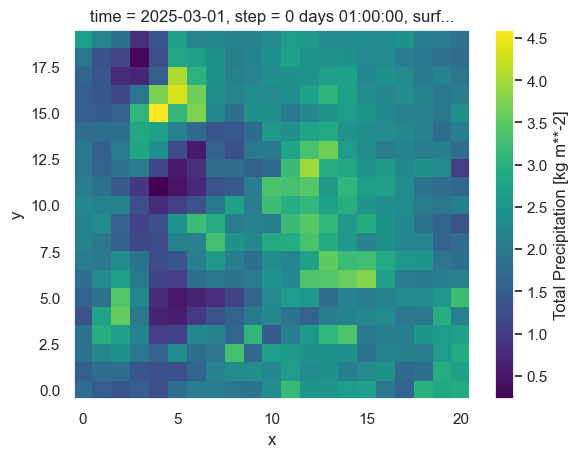

In [83]:
ds_0m.tp.plot()

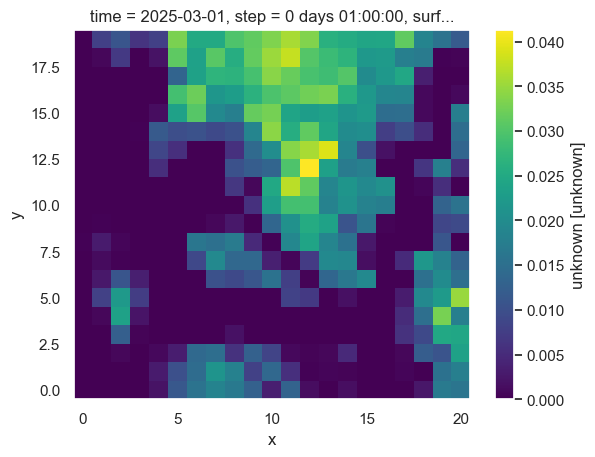

In [84]:
ds_0m.unknown.plot()

In [85]:
ds_list[3] # swe on it's onw? surface...

<xarray.Dataset> Size: 8kB
Dimensions:     (y: 20, x: 21)
Coordinates:
    time        datetime64[ns] 8B 2025-03-01
    step        timedelta64[ns] 8B 01:00:00
    surface     float64 8B 0.0
    latitude    (y, x) float64 3kB 58.08 58.08 58.08 58.08 ... 58.59 58.59 58.59
    longitude   (y, x) float64 3kB 225.1 225.1 225.2 225.2 ... 226.0 226.0 226.1
    valid_time  datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables:
    sdwe        (y, x) float32 2kB 0.0 0.0 0.0 0.0 ... 2.409 2.049 1.991 1.465
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

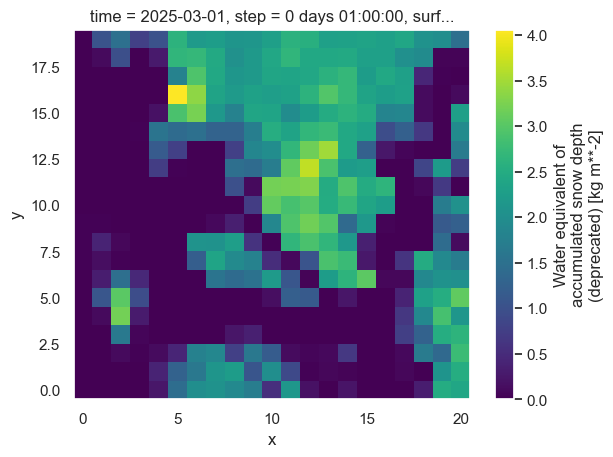

In [86]:
ds_list[3].sdwe.plot()

We do not need this one.. let's focus on merging the other 3 

## Merge the datasets to get all variables together

In [87]:
# drop the heightAboveGround coordinate for all three datasets 
ds_10m = ds_10m.drop('heightAboveGround')
ds_2m = ds_2m.drop('heightAboveGround')
ds_0m = ds_0m.drop('heightAboveGround')

/tmp/ipykernel_3475719/2844165235.py:2: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds_10m = ds_10m.drop('heightAboveGround')
/tmp/ipykernel_3475719/2844165235.py:3: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds_2m = ds_2m.drop('heightAboveGround')
/tmp/ipykernel_3475719/2844165235.py:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds_0m = ds_0m.drop('heightAboveGround')


In [115]:
# now merge all the datasets from ds_list...
ds = xr.merge([ds_0m, ds_2m, ds_10m]) # but height above ground is still an issue since they have different values... 
ds

<xarray.Dataset> Size: 32kB
Dimensions:     (y: 20, x: 21)
Coordinates:
    time        datetime64[ns] 8B 2025-03-01
    step        timedelta64[ns] 8B 01:00:00
    surface     float64 8B 0.0
    latitude    (y, x) float64 3kB 58.08 58.08 58.08 58.08 ... 58.59 58.59 58.59
    longitude   (y, x) float64 3kB 225.1 225.1 225.2 225.2 ... 226.0 226.0 226.1
    valid_time  datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables: (12/15)
    unknown     (y, x) float32 2kB ...
    t           (y, x) float32 2kB ...
    sp          (y, x) float32 2kB ...
    prate       (y, x) float32 2kB ...
    sde         (y, x) float32 2kB ...
    orog        (y, x) float32 2kB ...
    ...          ...
    sdswrf      (y, x) float32 2kB ...
    sdlwrf      (y, x) float32 2kB ...
    t2m         (y, x) float32 2kB ...
    r2          (y, x) float32 2kB ...
    u10         (y, x) float32 2kB ...
    v10         (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

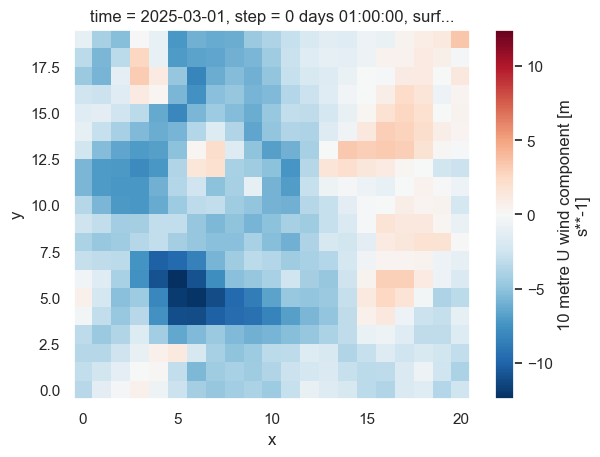

In [116]:
ds.u10.plot()

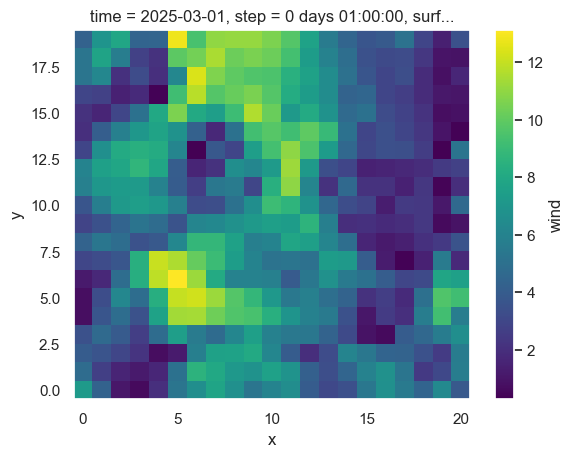

In [117]:
# calculate windspeed from u and v
ds['wind'] = np.sqrt(ds['u10']**2 + ds['v10']**2)
ds['wind'].plot()

In [118]:
ds.u10.attrs

{'GRIB_paramId': 165,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 420,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'eastward_wind',
 'GRIB_cfVarName': 'u10',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '10 metre U wind component',
 'GRIB_shortName': '10u',
 'GRIB_units': 'm s**-1',
 'long_name': '10 metre U wind component',
 'units': 'm s**-1',
 'standard_name': 'eastward_wind'}

In [119]:
ds['u10'].attrs['units']

'm s**-1'

In [120]:
ds['wind'].attrs

{}

In [121]:
ds['wind'].attrs =  ds['u10'].attrs
ds['wind'].attrs

{'GRIB_paramId': 165,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 420,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'eastward_wind',
 'GRIB_cfVarName': 'u10',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '10 metre U wind component',
 'GRIB_shortName': '10u',
 'GRIB_units': 'm s**-1',
 'long_name': '10 metre U wind component',
 'units': 'm s**-1',
 'standard_name': 'eastward_wind'}

Now, change a few names...

In [122]:
ds['wind'].attrs['long_name'] = '10 metre wind speed calculated from u and v wind components'
ds['wind'].attrs['long_name']

'10 metre wind speed calculated from u and v wind components'

In [123]:
ds['wind'].attrs['GRIB_shortName'] = '10m wind'
ds['wind'].attrs['standard_name'] = 'wind speed'
ds['wind'].attrs['GRIB_name'] = '10 metre wind speed'
ds['wind'].attrs['GRIB_cfName'] = 'wind_speed'
ds['wind'].attrs['GRIB_cfVarName'] ='wind10'
ds['wind'].attrs

{'GRIB_paramId': 165,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 420,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'wind_speed',
 'GRIB_cfVarName': 'wind10',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '10 metre wind speed',
 'GRIB_shortName': '10m wind',
 'GRIB_units': 'm s**-1',
 'long_name': '10 metre wind speed calculated from u and v wind components',
 'units': 'm s**-1',
 'standard_name': 'wind speed'}

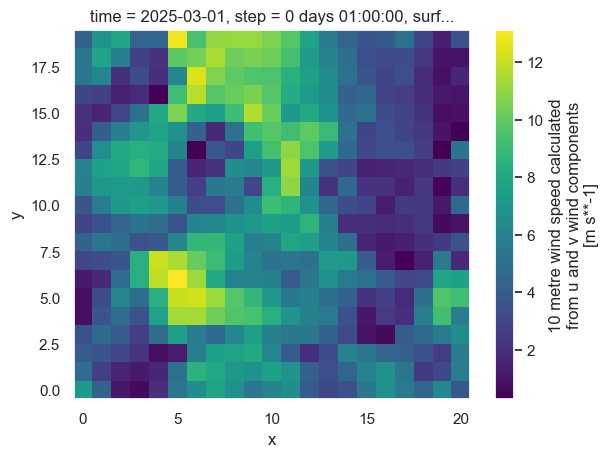

In [124]:
ds.wind.plot()

In [125]:
ds

<xarray.Dataset> Size: 34kB
Dimensions:     (y: 20, x: 21)
Coordinates:
    time        datetime64[ns] 8B 2025-03-01
    step        timedelta64[ns] 8B 01:00:00
    surface     float64 8B 0.0
    latitude    (y, x) float64 3kB 58.08 58.08 58.08 58.08 ... 58.59 58.59 58.59
    longitude   (y, x) float64 3kB 225.1 225.1 225.2 225.2 ... 226.0 226.0 226.1
    valid_time  datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables: (12/16)
    unknown     (y, x) float32 2kB ...
    t           (y, x) float32 2kB ...
    sp          (y, x) float32 2kB ...
    prate       (y, x) float32 2kB ...
    sde         (y, x) float32 2kB ...
    orog        (y, x) float32 2kB ...
    ...          ...
    sdlwrf      (y, x) float32 2kB ...
    t2m         (y, x) float32 2kB ...
    r2          (y, x) float32 2kB ...
    u10         (y, x) float32 2kB -3.468 -1.343 -0.2181 ... 0.9069 1.219 3.469
    v10         (y, x) float32 2kB 6.355 4.043 1.043 ... 2.793 0.6676 -0.2074
    wind        (y, x) float32 2kB 7.24 4.26 1.065 0.596 ... 2.936 1.39 3.476
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [126]:
# now, let's rename a few things to make this easier 
# ds = ds.rename({'t':   'temp_0m',
#                 'sp':  'pres_0m', 
#                 't2m': 'temp_2m',
#                 'r2':  'rh_2m', 
#                 'sdwe':'swe', 
#                 'sde': 'hs',
#                 'sdswrf': 'swrad',
#                 'sdlwrf': 'lwrad',
#                 'tp': 'precip_accum',
#                 'prate': 'precip_rate',
#                 })

ds = ds.rename({'t':   'temp_surface',
                'sp':  'pressure', 
                't2m': 'temp',
                'r2':  'rh', 
                'sdwe':'swe', 
                'sde': 'snowdepth',
                'sdswrf': 'swrad',
                'sdlwrf': 'lwrad',
                'tp': 'precip_total',
                'prate': 'precip_rate',
                })

ds

<xarray.Dataset> Size: 34kB
Dimensions:       (y: 20, x: 21)
Coordinates:
    time          datetime64[ns] 8B 2025-03-01
    step          timedelta64[ns] 8B 01:00:00
    surface       float64 8B 0.0
    latitude      (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59 58.59
    longitude     (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.0 226.1
    valid_time    datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables: (12/16)
    unknown       (y, x) float32 2kB ...
    temp_surface  (y, x) float32 2kB ...
    pressure      (y, x) float32 2kB ...
    precip_rate   (y, x) float32 2kB ...
    snowdepth     (y, x) float32 2kB ...
    orog          (y, x) float32 2kB ...
    ...            ...
    lwrad         (y, x) float32 2kB ...
    temp          (y, x) float32 2kB ...
    rh            (y, x) float32 2kB ...
    u10           (y, x) float32 2kB -3.468 -1.343 -0.2181 ... 1.219 3.469
    v10           (y, x) float32 2kB 6.355 4.043 1.043 ... 2.793 0.6676 -0.2074
    wind          (y, x) float32 2kB 7.24 4.26 1.065 0.596 ... 2.936 1.39 3.476
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [128]:
ds.unknown.attrs

{'GRIB_paramId': 0,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 420,
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'accum',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 'unknown',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': 'unknown',
 'GRIB_shortName': 'unknown',
 'GRIB_units': 'unknown',
 'long_name': 'unknown',
 'units': 'unknown',
 'standard_name': 'unknown'}

In [ ]:
# drop the unknown variable in ds
ds = ds.drop_vars('unknown')
ds

<xarray.Dataset> Size: 32kB
Dimensions:       (y: 20, x: 21)
Coordinates:
    time          datetime64[ns] 8B 2025-03-01
    step          timedelta64[ns] 8B 01:00:00
    surface       float64 8B 0.0
    latitude      (y, x) float64 3kB 58.08 58.08 58.08 ... 58.59 58.59 58.59
    longitude     (y, x) float64 3kB 225.1 225.1 225.2 ... 226.0 226.0 226.1
    valid_time    datetime64[ns] 8B 2025-03-01T01:00:00
Dimensions without coordinates: y, x
Data variables: (12/15)
    temp_surface  (y, x) float32 2kB ...
    pressure      (y, x) float32 2kB ...
    precip_rate   (y, x) float32 2kB ...
    snowdepth     (y, x) float32 2kB ...
    orog          (y, x) float32 2kB ...
    precip_total  (y, x) float32 2kB ...
    ...            ...
    lwrad         (y, x) float32 2kB ...
    temp          (y, x) float32 2kB ...
    rh            (y, x) float32 2kB ...
    u10           (y, x) float32 2kB -3.468 -1.343 -0.2181 ... 1.219 3.469
    v10           (y, x) float32 2kB 6.355 4.043 1.043 ... 2.793 0.6676 -0.2074
    wind          (y, x) float32 2kB 7.24 4.26 1.065 0.596 ... 2.936 1.39 3.476
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

The next step would be to stack multiple datasets together...

Let's do that in another script and simplify this loading 